In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

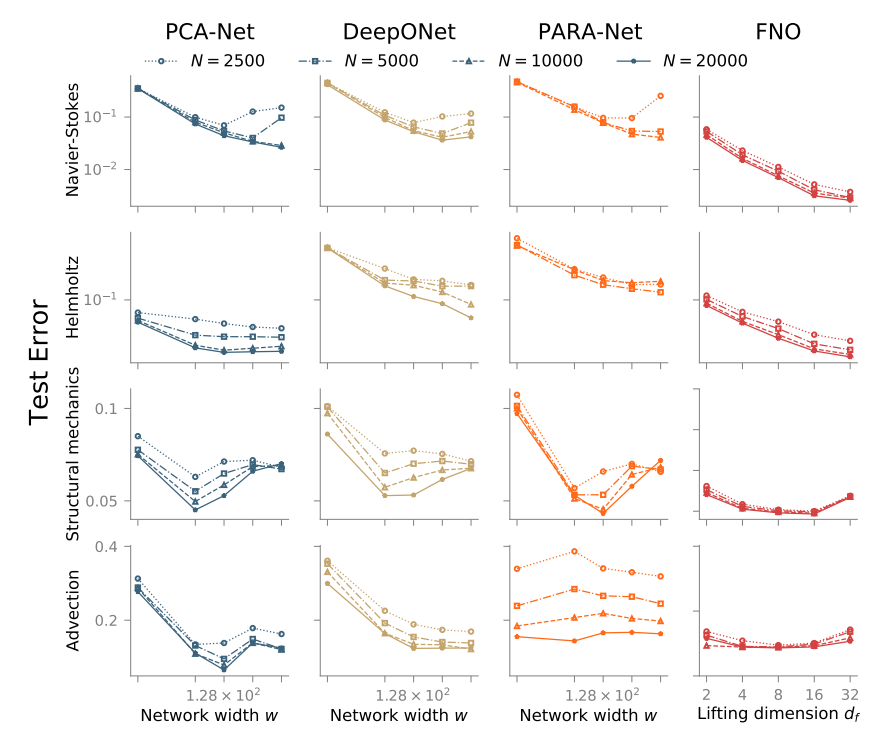

In [2]:
#https://www.textfixer.com/tools/remove-line-breaks.php

In [3]:
import pandas as pd

In [4]:
PCANet = pd.read_csv("data/PCA_NS.csv", header = None).to_numpy()
DeepONet = pd.read_csv("data/DeepONet_NS.csv", header = None).to_numpy()
Para = pd.read_csv("data/PARA_NS.csv", header = None).to_numpy()
FNO = pd.read_csv("data/FNO_NS.csv", header = None).to_numpy()

In [5]:
np.min(PCANet[:,4]), np.min(FNO[:,4]), np.min(DeepONet[:, 4]), np.min(Para[:, 4])

(0.0265426634891468, 0.0025958558834448, 0.036294716381357, 0.0408874673219641)

In [6]:
#The columns = [Nexamples, network width, Train, Test]

Text(0, 0.5, 'Test accuracy')

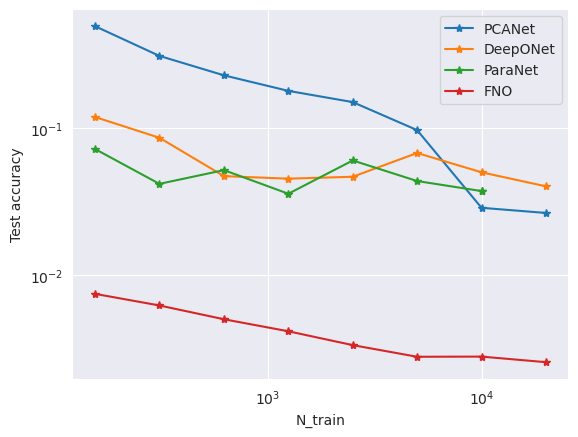

In [7]:
import seaborn as sns
sns.set_style('darkgrid')

#plt.plot(PCA[PCA[:,1] == 512][:,0], PCA[PCA[:,1] == 512][:, 3])
plt.plot(PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4],'-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,1] == 512][:,0], DeepONet[DeepONet[:,1] == 512][:, 3],'-*', label = 'DeepONet')
plt.plot(Para[Para[:,1] == 512][:,0], Para[Para[:,1] == 512][:, 3],'-*', label = 'ParaNet')
plt.plot(FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 3],'-*', label = 'FNO')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N_train')
plt.ylabel('Test accuracy')

In [8]:
Inputs = np.load('data/NavierStokes_inputs.npy')
Outputs = np.load('data/NavierStokes_outputs.npy')

In [9]:
Inputs.shape

(64, 64, 40000)

In [10]:
Inputs = Inputs.transpose((2,1,0))
Outputs = Outputs.transpose((2,1,0))

Inputs_fl = Inputs.reshape(len(Inputs), 64*64)
Outputs_fl = Outputs.reshape(len(Outputs), 64*64)

Linear regression

In [12]:
results = []
for Ntrain in [5000, 10000, 20000]:
    for N_components in [16, 32, 64, 128]:
        print(Ntrain, N_components)
        Ytr = Outputs_fl[:Ntrain]
        Xtr = Inputs_fl[:Ntrain]
        pca = PCA(n_components=min(N_components,Ntrain))
        Xtr = pca.fit_transform(Xtr)
        reg = LinearRegression(n_jobs = -1).fit(Xtr, Ytr)
        #Ypred Ypredtr = reg.predict(Xtr)
        Ypredtr = reg.predict(Xtr)
        train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
        Xtest = Inputs_fl[20000:]
        Ytest = Outputs_fl[20000:]
        Xtest = pca.transform(Xtest)
        Ypred = reg.predict(Xtest)
        test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
        print(train_error, test_error)
        results.append([Ntrain, N_components, train_error, test_error])

results = np.array(results)

5000 16
0.32345042894373044 0.32937220885827767
5000 32
0.13894284633252083 0.14234885679041667
5000 64
0.0641710017331576 0.06520002636019676
5000 128
0.05368587531898827 0.0547389616091764
10000 16
0.32558967529272886 0.32902784605618024
10000 32
0.140200051843655 0.14177757814535666
10000 64
0.06424398063144322 0.06491258797544562
10000 128
0.053638368429572134 0.05433956459247912
20000 16
0.32699001456263943 0.3284865520329245
20000 32
0.14076390374444622 0.1415014481646009
20000 64
0.06436471280067571 0.06474512424652544
20000 128
0.053725043539182796 0.05412917367102096


Text(0, 0.5, 'Test accuracy')

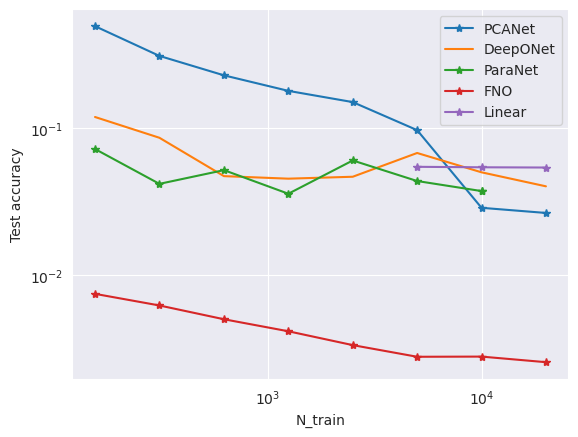

In [13]:
#plt.plot(PCA[PCA[:,1] == 512][:,0], PCA[PCA[:,1] == 512][:, 3])
plt.plot(PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4],'-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,1] == 512][:,0], DeepONet[DeepONet[:,1] == 512][:, 3], label = 'DeepONet')
plt.plot(Para[Para[:,1] == 512][:,0], Para[Para[:,1] == 512][:, 3],'-*', label = 'ParaNet')
plt.plot(FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 3],'-*', label = 'FNO')
plt.plot(results[results[:,1] == 128][:,0], results[results[:,1] == 128][:, 3],'-*', label = 'Linear')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N_train')
plt.ylabel('Test accuracy')

Cost vs accuracy

In [16]:
resultspca = []
for Ntrain in [10000]:
    for N_components in [8,16, 32, 64, 128, 256, 512]:
        print(Ntrain)
        Ytr = Outputs_fl[:Ntrain]
        Xtr = Inputs_fl[:Ntrain]
        pca = PCA(n_components=N_components)
        Xtr = pca.fit_transform(Xtr)
        reg = LinearRegression(n_jobs = -1).fit(Xtr, Ytr)
        #Ypred Ypredtr = reg.predict(Xtr)
        Ypredtr = reg.predict(Xtr)
        train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
        Xtest = Inputs_fl[20000:]
        Ytest = Outputs_fl[20000:]
        Xtest = pca.transform(Xtest)
        Ypred = reg.predict(Xtest)
        test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
        resultspca.append([N_components, test_error])
#results = np.array(results)

10000
10000
10000
10000
10000
10000
10000


In [19]:
resultspca

[[8, 0.5086471004988675],
 [16, 0.32902767742497485],
 [32, 0.1417764805416794],
 [64, 0.06491252235537232],
 [128, 0.05433896061902034],
 [256, 0.054339492288471514],
 [512, 0.05433913950959782]]

In [17]:
m = 64*64
n = 64*64

def cplx(p):
    return min(2*m*n, (2*p-1)*n + (2*m-1)*p + m)

In [ ]:
Para[Para[:,0] == 10000][:,2][0,1,2,4]

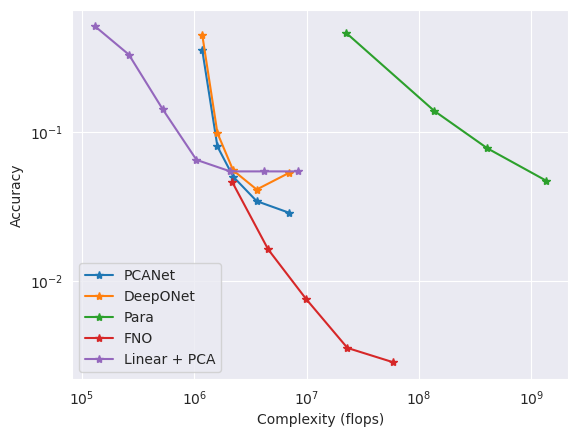

In [18]:
plt.xlabel('Complexity (flops)')
plt.ylabel('Accuracy')
plt.plot(PCANet[PCANet[:,0] == 10000][:,2], PCANet[PCANet[:,0] == 10000][:, 4], '-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,0] == 10000][:,2], DeepONet[DeepONet[:,0] == 10000][:, 4], '-*', label = 'DeepONet')
plt.plot(Para[Para[:,0] == 10000][:4,2], Para[Para[:,0] == 10000][:4, 4], '-*', label = 'Para')
plt.plot(FNO[FNO[:,0] == 20000][:,2], FNO[FNO[:,0] == 10000][:, 4], '-*', label = 'FNO')
#plt.scatter([cplx(128)], [results[:, 2][-1]], marker = 'x', s = 50, color = 'black', label = 'Linear (no PCA)')
plt.plot([cplx(i) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-*', label = 'Linear + PCA')
plt.legend()
plt.xscale('log')
plt.yscale('log')

GP regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, RationalQuadratic

kernel = Matern(nu = 2.5)

Xtr.shape

resultsgp = []
for Ntrain in [156, 312, 624, 1250, 2500]:
    print(Ntrain)
    Ytr = Outputs_fl[:Ntrain]
    Xtr = Inputs_fl[:Ntrain]
    pca = PCA(n_components=128)
    Xtr = pca.fit_transform(Xtr)
    
    model = GaussianProcessRegressor(kernel, alpha = 1e-10)
    model.fit(Xtr, Ytr)
    #Ypred Ypredtr = reg.predict(Xtr)
    Ypredtr = model.predict(Xtr)
    train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
    Xtest = Inputs_fl[20000:]
    Ytest = Outputs_fl[20000:]
    Xtest = pca.transform(Xtest)
    Ypred= model.predict(Xtest)
    test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
    print(train_error, test_error)
    resultsgp.append([Ntrain, train_error, test_error])

156


In [ ]:
resultsgp = np.array(resultsgp)

In [ ]:
#plt.plot(PCA[PCA[:,1] == 512][:,0], PCA[PCA[:,1] == 512][:, 3])
plt.plot(PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4],'-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,1] == 512][:,0], DeepONet[DeepONet[:,1] == 512][:, 3], label = 'DeepONet')
plt.plot(Para[Para[:,1] == 512][:,0], Para[Para[:,1] == 512][:, 3],'-*', label = 'ParaNet')
plt.plot(FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 3],'-*', label = 'FNO')
plt.plot(results[results[:,1] == 128][:,0], results[results[:,1] == 128][:, 3],'-*', label = 'Linear')
plt.plot(resultsgp[:,0], resultsgp[:, 2],'-*', label = 'GPMatern')

plt.legend()
plt.xscale('log')
plt.yscale('log')
